In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

### Загрузка данных
из-за того, что по прямой ссылке на файл скачать не удалось(приколы яндекса), пришлось загружать данные в репозиторий(уж простите)

In [2]:
df_customers = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-shevchenko-39/first_project/olist_customers_dataset.csv")
df_orders = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-shevchenko-39/first_project/olist_orders_dataset.csv")
df_order_items = pd.read_csv("/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-shevchenko-39/first_project/olist_order_items_dataset.csv")

In [3]:
df_customers.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
df_orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
df_order_items.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Исследование данных
Что такое покупка?

Исследовать необходимо таблицу df_orders, которая хранится данные о заказах, и таблицу df_order_items, которая имеет уникальный номер товара 

In [6]:
df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


Посмотрим уникальные данные столбцов: order_status(статус заказа)

Также проверим количество уникальных элементов в каждом столбце для каждого из датафреймов

In [7]:
df_orders.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [8]:
df_orders.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [9]:
df_order_items.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [10]:
#создадим один большой датафрейм, с которым можно будет исследовать данные
df_shop_grand = df_customers.merge(df_orders,on = 'customer_id', how='outer'). \
    merge(df_order_items,on = 'order_id', how='outer')
df_shop_grand

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,1.0,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88
113421,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,1.0,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10 08:35:12,114.90,14.16
113422,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,1.0,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12 20:30:03,37.00,19.04
113423,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,1.0,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09 21:15:51,689.00,22.07


Так как количество уникальных(по product_id) продуктов и количество номеров чека(по order_id) меньше, то некоторые товары имеют изменение статуса. 

Можно по хронологии статуса определить, что является покупкой. 

order_status принимает значения: created(создан),approved(подтвержден),invoiced(выставлен счет),processing(в процессе сборки),shipped(отгружен со склада),delivered(доставлен пользователю),unavailable(недоступен),canceled(отменен)

In [11]:
df_shop_status = df_shop_grand[["customer_id","order_id","order_status","order_item_id","product_id"]]
df_shop_status = df_shop_status.sort_values(["customer_id","order_id"])
df_shop_status

,customer_id,order_id,order_status,order_item_id,product_id
96706,00012a2ce6f8dcda20d059ce98491703,5f79b5b0931d63f1a42989eb65b9da6e,delivered,1.0,64315bd8c0c47303179dd2e25b579d00
31143,000161a058600d5901f007fab4c27140,a44895d095d7e0702b6a162fa2dbeced,delivered,1.0,84183944dc7cddca87a5d384452c1d3c
72702,0001fd6190edaaf884bcaf3d49edf079,316a104623542e4d75189bb372bc5f8d,delivered,1.0,9df2b21ec85378d71df4404712e17478
111483,0002414f95344307404f0ace7a26f1d5,5825ce2e88d5346438686b0bba99e5ee,delivered,1.0,af3ec22cce878225aae6d9eb6c7a78eb
68318,000379cdec625522490c315e70c7a9fb,0ab7fb08086d4af9141453c91878ed7a,delivered,1.0,868b3136c5b206f91b8208fbfdf2cb7c
...,...,...,...,...,...
108822,fffeda5b6d849fbd39689bb92087f431,8c855550908247a7eff50281b92167a8,delivered,1.0,d5c263f4d651ba657c900ce70a4be7de
66952,ffff42319e9b2d713724ae527742af25,83b5fc912b2862c5046555ded1483ae9,delivered,1.0,e61c78a7343d82c0539d27df0f7dfc31
38633,ffffa3172527f765de70084a7e53aae8,d0e7be325a1c986babc4e1cdb91edc03,delivered,1.0,43ee88561093499d9e571d4db5f20b79
38634,ffffa3172527f765de70084a7e53aae8,d0e7be325a1c986babc4e1cdb91edc03,delivered,2.0,43ee88561093499d9e571d4db5f20b79


In [12]:
df_shop_status.order_status.unique()

array(['delivered', 'unavailable', 'processing', 'shipped', 'canceled',
       'invoiced', 'created', 'approved'], dtype=object)

In [13]:
df_shop_status.query("order_status == 'canceled'")

,customer_id,order_id,order_status,order_item_id,product_id
55105,002b5342c72978cf0aba6aae1f5d5293,21a00b08cbeb5716bbb66105e3dbd850,canceled,NaN,NaN
33078,00f8a4bbb515bfe8f84f9cfa45621250,25fd9ab410ed941187c41224aaecd049,canceled,1.0,5d42919d908b17ec1848699d89e2bace
94774,01866d949d55c81c28d255114948b72b,fc3c882665c98c9b737a7b1b3aa6c553,canceled,1.0,44aadbb26d5c81d9846b0c48bc00d7a3
91342,019f5bb93ed18dd059051c3f81abe394,edeae57fd6bee25e030ac14863a6ae0f,canceled,1.0,e4d66ba222533f24e4d74a5d4c4846d3
35117,032a544bbe984490f6ff7450e3c8b0bc,2663ce3526465b7ee9809428adabdc45,canceled,NaN,NaN
...,...,...,...,...,...
46914,fe0697e0aefd1e73bef77dd71948100d,d15a203ea25983a3a17ec382a8a9122e,canceled,1.0,20eec5e935bad5e35e6fd4a6af9b1a63
24287,fea4d57ed3a45455f89c25ef3dae8ee8,87ae60ef8b08ae0e5f903cacb53a6904,canceled,NaN,NaN
86820,fed67945c09986de880e4b3fdd1d3f07,9512251cbae0778ea863f6242d3e5789,canceled,1.0,0527af46c46b7a345d2086ea304ae8d7
47581,ff31bee1ba4bba00cc14b1b91c8d28f3,f86d7bc39aab05299691322044b63bb2,canceled,NaN,NaN


In [14]:
df_shop_status.query("product_id == 'ee54bc9ad38ada9c4692f91362601c9e'")

,customer_id,order_id,order_status,order_item_id,product_id
80810,c7148da8b575be2e41e23cb3e34edf5b,541d81a8afee2348b192cc10df37367c,canceled,1.0,ee54bc9ad38ada9c4692f91362601c9e
80811,c7148da8b575be2e41e23cb3e34edf5b,541d81a8afee2348b192cc10df37367c,canceled,2.0,ee54bc9ad38ada9c4692f91362601c9e
80812,c7148da8b575be2e41e23cb3e34edf5b,541d81a8afee2348b192cc10df37367c,canceled,3.0,ee54bc9ad38ada9c4692f91362601c9e
80813,c7148da8b575be2e41e23cb3e34edf5b,541d81a8afee2348b192cc10df37367c,canceled,4.0,ee54bc9ad38ada9c4692f91362601c9e


In [15]:
df_shop_status.query("order_status == 'canceled' and order_item_id != 1")

,customer_id,order_id,order_status,order_item_id,product_id
55105,002b5342c72978cf0aba6aae1f5d5293,21a00b08cbeb5716bbb66105e3dbd850,canceled,NaN,NaN
35117,032a544bbe984490f6ff7450e3c8b0bc,2663ce3526465b7ee9809428adabdc45,canceled,NaN,NaN
92980,0337719c3caba8187a276942d35347fd,d2bc174d5c413f457a21db6899afb682,canceled,NaN,NaN
29739,0340b2de09f18a986fea9f26cc7b2d9c,34b3d6f518fb789c443e4ec00f9bb0ce,canceled,2.0,3ea32f63a6aaf8d467e543dedf434ee7
29740,0340b2de09f18a986fea9f26cc7b2d9c,34b3d6f518fb789c443e4ec00f9bb0ce,canceled,3.0,3ea32f63a6aaf8d467e543dedf434ee7
...,...,...,...,...,...
2282,f9a6bf8bc89af704ecd48975eff11800,d1b4fc9a8c1207433519a8ec52e2d03f,canceled,NaN,NaN
4399,fc253202cb10b4a99ac862321a854858,7fd4b0e047195ca197c3660772a8d8c0,canceled,NaN,NaN
98533,fc768a2275c44d9383cc6926adac469d,15ec3d48383c58c0dc96cd66f8884630,canceled,NaN,NaN
24287,fea4d57ed3a45455f89c25ef3dae8ee8,87ae60ef8b08ae0e5f903cacb53a6904,canceled,NaN,NaN


In [16]:
df_shop_status.query("order_status != 'canceled' and order_item_id != 1")

,customer_id,order_id,order_status,order_item_id,product_id
46351,00066ccbe787a588c52bd5ff404590e3,728416b0db65935dbf78a0cc03e8d6f8,delivered,2.0,368c6c730842d78016ad823897a372db
46352,00066ccbe787a588c52bd5ff404590e3,728416b0db65935dbf78a0cc03e8d6f8,delivered,3.0,368c6c730842d78016ad823897a372db
46353,00066ccbe787a588c52bd5ff404590e3,728416b0db65935dbf78a0cc03e8d6f8,delivered,4.0,368c6c730842d78016ad823897a372db
95129,000bf8121c3412d3057d32371c5d3395,bc3e295306ee4d3eba91aca49b0bb539,delivered,2.0,bae1013381fa74d68d18c89d313f97eb
58643,001450ebb4a77efb3d68be5f7887cb1e,41a75aec932b24ba50e98ba8b50b625d,delivered,2.0,dcbdf52239601eca861bf0d1aa598fab
...,...,...,...,...,...
8129,fff93c1da78dafaaa304ff032abc6205,2bedc0d7231e504d0476c606108e7e73,delivered,2.0,1ae28ef6d0421f92f2e4e6d407e90347
8130,fff93c1da78dafaaa304ff032abc6205,2bedc0d7231e504d0476c606108e7e73,delivered,3.0,3158c44b08596ff51ee3560fad16cc09
23150,fffc22669ca576ae3f654ea64c8f36be,74f833bf7c70ce8c3f820f725c213e1c,unavailable,NaN,NaN
38634,ffffa3172527f765de70084a7e53aae8,d0e7be325a1c986babc4e1cdb91edc03,delivered,2.0,43ee88561093499d9e571d4db5f20b79


In [17]:
df_shop_grand.query("order_id=='541d81a8afee2348b192cc10df37367c'")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
80810,c7148da8b575be2e41e23cb3e34edf5b,903ef81574df4baba67b022204c2aabb,38066,uberaba,MG,541d81a8afee2348b192cc10df37367c,canceled,2018-05-07 17:46:04,2018-05-07 18:34:41,NaN,NaN,2018-05-29 00:00:00,1.0,ee54bc9ad38ada9c4692f91362601c9e,4a3ccda38b2129705f3fb522db62ca31,2018-05-14 18:31:35,213.9,19.38
80811,c7148da8b575be2e41e23cb3e34edf5b,903ef81574df4baba67b022204c2aabb,38066,uberaba,MG,541d81a8afee2348b192cc10df37367c,canceled,2018-05-07 17:46:04,2018-05-07 18:34:41,NaN,NaN,2018-05-29 00:00:00,2.0,ee54bc9ad38ada9c4692f91362601c9e,4a3ccda38b2129705f3fb522db62ca31,2018-05-14 18:31:35,213.9,19.38
80812,c7148da8b575be2e41e23cb3e34edf5b,903ef81574df4baba67b022204c2aabb,38066,uberaba,MG,541d81a8afee2348b192cc10df37367c,canceled,2018-05-07 17:46:04,2018-05-07 18:34:41,NaN,NaN,2018-05-29 00:00:00,3.0,ee54bc9ad38ada9c4692f91362601c9e,4a3ccda38b2129705f3fb522db62ca31,2018-05-14 18:31:35,213.9,19.38
80813,c7148da8b575be2e41e23cb3e34edf5b,903ef81574df4baba67b022204c2aabb,38066,uberaba,MG,541d81a8afee2348b192cc10df37367c,canceled,2018-05-07 17:46:04,2018-05-07 18:34:41,NaN,NaN,2018-05-29 00:00:00,4.0,ee54bc9ad38ada9c4692f91362601c9e,4a3ccda38b2129705f3fb522db62ca31,2018-05-14 18:31:35,213.9,19.38


In [18]:
df_shop_grand.query("order_id=='728416b0db65935dbf78a0cc03e8d6f8'")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
46350,00066ccbe787a588c52bd5ff404590e3,15090f48004f3b0fc18a167ef82af4db,93525,novo hamburgo,RS,728416b0db65935dbf78a0cc03e8d6f8,delivered,2018-02-06 16:10:09,2018-02-08 07:49:51,2018-02-14 19:58:58,2018-02-21 22:22:17,2018-03-12 00:00:00,1.0,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-14 07:49:51,49.9,17.6
46351,00066ccbe787a588c52bd5ff404590e3,15090f48004f3b0fc18a167ef82af4db,93525,novo hamburgo,RS,728416b0db65935dbf78a0cc03e8d6f8,delivered,2018-02-06 16:10:09,2018-02-08 07:49:51,2018-02-14 19:58:58,2018-02-21 22:22:17,2018-03-12 00:00:00,2.0,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-14 07:49:51,49.9,17.6
46352,00066ccbe787a588c52bd5ff404590e3,15090f48004f3b0fc18a167ef82af4db,93525,novo hamburgo,RS,728416b0db65935dbf78a0cc03e8d6f8,delivered,2018-02-06 16:10:09,2018-02-08 07:49:51,2018-02-14 19:58:58,2018-02-21 22:22:17,2018-03-12 00:00:00,3.0,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-14 07:49:51,49.9,17.6
46353,00066ccbe787a588c52bd5ff404590e3,15090f48004f3b0fc18a167ef82af4db,93525,novo hamburgo,RS,728416b0db65935dbf78a0cc03e8d6f8,delivered,2018-02-06 16:10:09,2018-02-08 07:49:51,2018-02-14 19:58:58,2018-02-21 22:22:17,2018-03-12 00:00:00,4.0,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-14 07:49:51,49.9,17.6


Так как уникальный пользователь сделал заказ, но в таблице нет данных о истории заказа, следовательно можно судить, что заказ имеет только один статус, и при изменении статуса не добавляется новая строчка, а изменяется старая

Историю заказа можно отследить по order_item_id, который показывается изменения истории заказа ( но в конечном счете, если заказ отменялся/доставлен, тогда везде ставится отмена/доставлен, также и с датами)

Покупатель может отменить заказ во время других статусом, кроме статуса delivered, который говорит о том, что покупка клиента завершена успешно. Почему не когда заказ оплачен? Потому что заказ может быть отменен, поэтому покупку можно считать завершенной, только если товар уже у получателя

### Задание 1. Сколько у нас пользователей, которые совершили покупку только один раз?

In [19]:
df_shop = df_shop_grand[["customer_unique_id","order_id","order_status"]]

In [20]:
count_shop_1 = df_shop.query("order_status == 'delivered'").groupby(["customer_unique_id","order_id"], as_index=False).agg({"order_status": "count"})
count_shop_1.query("customer_unique_id == 'fffcf5a5ff07b0908bd4e2dbc735a684'")
#не факт, что у человека не может быть два заказа и более

,customer_unique_id,order_id,order_status
96473,fffcf5a5ff07b0908bd4e2dbc735a684,725cf8e9c24e679a8a5a32cb92c9ce1e,2


In [21]:
count_shop_1

,customer_unique_id,order_id,order_status
0,0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9,1
2,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,1
3,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,1
4,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,1
...,...,...,...
96473,fffcf5a5ff07b0908bd4e2dbc735a684,725cf8e9c24e679a8a5a32cb92c9ce1e,2
96474,fffea47cd6d3cc0a88bd621562a9d061,c71b9252fd7b3b263aaa4cb09319a323,1
96475,ffff371b4d645b6ecea244b27531430a,fdc45e6c7555e6cb3cc0daca2557dbe1,1
96476,ffff5962728ec6157033ef9805bacc48,94d3ee0bc2a0af9d4fa47a4d63616e8d,1


In [22]:
count_shop_1 =count_shop_1.groupby("customer_unique_id",as_index = False).agg({"order_id":"count"})
count_shop_1

,customer_unique_id,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,1
93354,fffea47cd6d3cc0a88bd621562a9d061,1
93355,ffff371b4d645b6ecea244b27531430a,1
93356,ffff5962728ec6157033ef9805bacc48,1


In [23]:
count_shop_1.shape[0]

93358

Ответ: 93358 людей купили один раз

### Задание 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

Заказ имеет один статус, который обновляется и влияет на остальные строчки этого заказа

In [24]:
df_not_deliv = df_shop_grand[["order_id","order_purchase_timestamp","order_status"]]
df_not_deliv = df_not_deliv.groupby(["order_id"],as_index = False).agg({"order_status":"unique","order_purchase_timestamp":"unique"})
# так как после unique данные почему то находятся в одномерном массиве, их нужно достать
df_not_deliv.order_status = df_not_deliv.order_status.apply(lambda x: x[0])
df_not_deliv.order_purchase_timestamp = df_not_deliv.order_purchase_timestamp.apply(lambda x: x[0])

# Преобразование столбца к типу данных datetime
df_not_deliv['order_purchase_timestamp'] = pd.to_datetime(df_not_deliv['order_purchase_timestamp'])
# Создание нового столбца, содержащего даты в формате год-месяц
df_not_deliv['order_purchase_timestamp'] = df_not_deliv['order_purchase_timestamp'].dt.strftime('%m')
df_not_deliv.sort_values('order_purchase_timestamp')

,order_id,order_status,order_purchase_timestamp
75280,c1d6c7866879dee0e3bfc28dbe2edd54,delivered,01
29810,4c9030a09c44d1059676919ef4b11265,delivered,01
71125,b76190a2c095fba255ab46987545a660,delivered,01
29803,4c8ea2a4ee7b1d91b837360ccb23fe89,delivered,01
8123,14f38e83e237f237348b97dd9f228d40,delivered,01
...,...,...,...
64420,a6832f84211588f24e426d167333044e,delivered,12
10530,1b0ca0c3b2421d7ffde52594b571c020,delivered,12
10529,1b0c7ed83d9a4480ab15d766b446efd9,delivered,12
64448,a692aceed36257892ac418b3d451b925,delivered,12


In [25]:
df_not_deliv = df_not_deliv.query("order_status != 'delivered'").sort_values('order_purchase_timestamp')
df_not_deliv

,order_id,order_status,order_purchase_timestamp
11085,1c851b2d3587fe02888b58c64fbc1ab0,unavailable,01
83038,d56ec35ab3257ad373bdbca2a1516715,shipped,01
67081,ad380680e87dea0f2abf5cd5bace626c,shipped,01
94871,f434066a90c729686966ab151fa4c7ec,unavailable,01
94753,f3e5a0592463640ef9fd04d79724dac9,unavailable,01
...,...,...,...
36207,5d80dfb48f5c62fe1cbd194b1b6f57bd,unavailable,12
50662,82ba09cde004c6bcefd36545670ac5de,invoiced,12
5107,0cfc5b8b63bf71f738f96e68adb96b3d,unavailable,12
49940,80cc641291fcdf79b31212ddd7b175c9,processing,12


In [26]:
#создам таблицу, где будет удобно достать данные о причинах, месяце и их количестве
df_not_deliver = df_not_deliv.groupby(["order_purchase_timestamp","order_status"]). \
    agg({"order_status":"count"}). \
    rename(columns ={"order_status":"status_count"}).reset_index()

df_not_deliver

,order_purchase_timestamp,order_status,status_count
0,01,canceled,37
1,01,invoiced,27
2,01,processing,38
3,01,shipped,90
4,01,unavailable,58
...,...,...,...
60,12,created,2
61,12,invoiced,13
62,12,processing,35
63,12,shipped,57


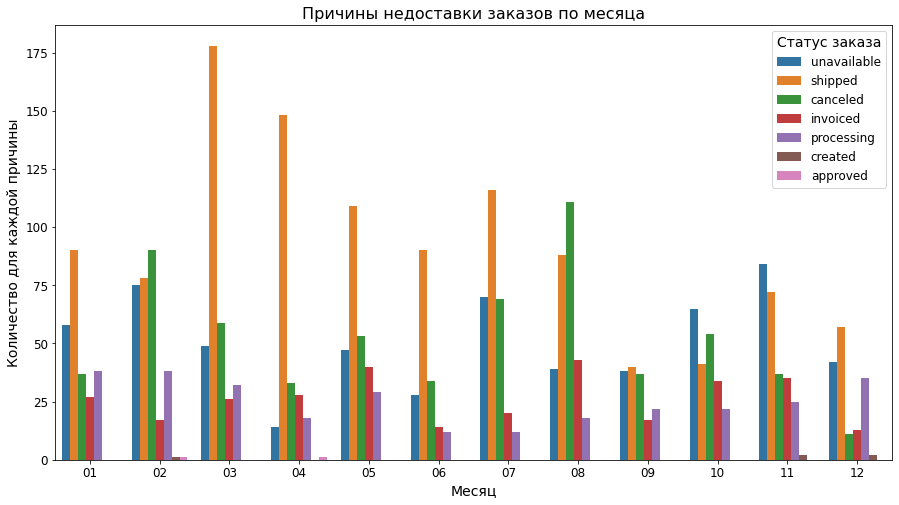

In [27]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x='order_purchase_timestamp', hue='order_status', data = df_not_deliv,ax=ax)


# Настройка параметров графика
ax.set_title('Причины недоставки заказов по месяца', fontsize=16)
ax.set_xlabel('Месяц', fontsize=14)
ax.set_ylabel('Количество для каждой причины', fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.legend(title='Статус заказа', fontsize=12, title_fontsize=14)

### Задача 3. По каждому товару определить, в какой день недели товар чаще всего покупается.

Нужно взять дату создания заказа и учесть, что товар по итогу был доставлен, т.е покупка завершилась успешно

In [28]:
df_deliv = df_shop_grand[["order_id","product_id","order_purchase_timestamp","order_status"]]
df_deliv = df_deliv.groupby(["order_id","product_id"],as_index = False).agg({"order_status":"unique","order_purchase_timestamp":"unique"})
df_deliv.order_status = df_deliv.order_status.apply(lambda x: x[0])
df_deliv.order_purchase_timestamp = df_deliv.order_purchase_timestamp.apply(lambda x: x[0])

# Преобразование столбца к типу данных datetime
df_deliv['order_purchase_timestamp'] = pd.to_datetime(df_deliv['order_purchase_timestamp'])
# Создание нового столбца, содержащего даты в формате год-месяц
df_deliv['order_purchase_timestamp'] = df_deliv['order_purchase_timestamp'].dt.week
df_deliv.sort_values('order_purchase_timestamp')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


,order_id,product_id,order_status,order_purchase_timestamp
89532,df61cd26aece2f40eb66883de3a81e1f,5fb1e24560c31b0eaa1911d4247187ed,delivered,1
2351,05ce7829fca9c640cd884ba446956158,f35692adbe05fa7ed058875df5ea9f99,delivered,1
13715,225d8e0b99ff5a086559a0ec1b21f7c5,fe406983ad8b9e20a5b18801f39ece27,delivered,1
29521,49b95140e13dd1a0bb7e43807433a026,c21afe62d4629a660593fd9b5e6223bb,delivered,1
7487,12ab31863d076fffc0578c5556082865,747152211829957938862c1c57a30f16,delivered,1
...,...,...,...,...
57371,9042419915d957145ecb21925709a601,3fc18e3aefe7b9346bd15de863fa0365,delivered,52
90619,e2078bdcaaa9e81bb8bab8641489dcd8,905b384ac5667170689505bbf30f1d07,delivered,52
70952,b1e3487949a5a179250f5e81214578e6,d678178aa4291cd25a755a90188375c8,delivered,52
57707,911c85d3422a9c87cf321ab2ebae2430,f4f67ccaece962d013a4e1d7dc3a61f7,delivered,52


In [29]:
df_deliv = df_deliv.query("order_status == 'delivered'").sort_values('order_purchase_timestamp')
df_deliv

,order_id,product_id,order_status,order_purchase_timestamp
5507,0db095732135cba036daafa8ae0d5559,cf8316c961640d38321241895b7811c2,delivered,1
55210,8a93a08970bdbe30795050e234aee858,9efcd67b3172c3165895c68c92b7df98,delivered,1
57281,900ee0470f53ec2e4e4a50a57b06a85a,35ebf08a93899d44e756809e11b14754,delivered,1
101389,fd5dcd7ef5f731d33e85a73c6a76e4a9,84f456958365164420cfc80fbe4c7fab,delivered,1
9843,189e75e25de4939a240746314c77f656,905b384ac5667170689505bbf30f1d07,delivered,1
...,...,...,...,...
34248,55a924f9f03b8eefb1d0ed3c312263ce,99a4788cb24856965c36a24e339b6058,delivered,52
79010,c589bcc1414f7d7d949f353b1d1a45d9,49e25af5dc73ad7ac3fefae03aea3e61,delivered,52
44922,7064a07883ee3b4bb82d7252c3519546,d272d0921188b0bd91542d704b21404e,delivered,52
57985,91d9a72e928a84866b4d506c0398b723,87ae34a2e6f971a135f8bea5ae7949a9,delivered,52


In [30]:
#создам таблицу, где будет удобно достать данные
df_deliv = df_deliv.groupby(["product_id","order_purchase_timestamp"],as_index=False). \
    agg({"order_id":"count"}). \
    rename(columns ={"order_id":"order_count"})

df_deliv

,product_id,order_purchase_timestamp,order_count
0,00066f42aeeb9f3007548bb9d3f33c38,20,1
1,00088930e925c41fd95ebfe695fd2655,50,1
2,0009406fd7479715e4bef61dd91f2462,51,1
3,000b8f95fcb9e0096488278317764d19,31,1
4,000b8f95fcb9e0096488278317764d19,32,1
...,...,...,...
76821,fffdb2d0ec8d6a61f0a0a0db3f25b441,13,1
76822,fffdb2d0ec8d6a61f0a0a0db3f25b441,16,1
76823,fffdb2d0ec8d6a61f0a0a0db3f25b441,18,1
76824,fffdb2d0ec8d6a61f0a0a0db3f25b441,32,2


### Задача 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

План: посчитать количество заказов в месяц для каждого пользователя, посчитать количество недель(разделить количество дней на 7). Найти среднее в неделю для месяца

In [31]:
def days_in_month(date):
    if date.month == 2:
        if date.year % 4 == 0 and (date.year % 100 != 0 or date.year % 400 == 0):
            return 29
        else:
            return 28
    elif date.month in [4, 6, 9, 11]:
        return 30
    else:
        return 31

In [32]:
# Преобразование столбца 'order_purchase_timestamp' к типу даты
df_a = df_shop_grand[["order_purchase_timestamp","order_id","customer_unique_id","order_status"]]
df_a = df_a.groupby(["customer_unique_id","order_id"],as_index = False).agg({"order_status":"unique","order_purchase_timestamp":"unique"})
df_a.order_status = df_a.order_status.apply(lambda x: x[0])
df_a.order_purchase_timestamp = df_a.order_purchase_timestamp.apply(lambda x: x[0])
df_a['order_purchase_timestamp'] = pd.to_datetime(df_a['order_purchase_timestamp'])
# Добавление столбца с номером месяца заказа
df_a['order_purchase_month'] = df_a['order_purchase_timestamp'].dt.month

# Добавить количество дней с помощью функции
df_a['days_in_month'] = df_a['order_purchase_timestamp'].apply(lambda x: days_in_month(x))

# Создание таблицы с данными о количестве заказов по месяцам для каждого пользователя
df_pivot = df_a.groupby(["customer_unique_id","order_purchase_month","days_in_month"],as_index=False). \
    agg({"order_id":"count"}). \
    rename(columns ={"order_id":"order_count"})

In [33]:
df_pivot["week"] = df_pivot.days_in_month / 7
df_pivot["average_shop"] = df_pivot.order_count / df_pivot.week

In [34]:
df_pivot

,customer_unique_id,order_purchase_month,days_in_month,order_count,week,average_shop
0,0000366f3b9a7992bf8c76cfdf3221e2,5,31,1,4.428571,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,5,31,1,4.428571,0.225806
2,0000f46a3911fa3c0805444483337064,3,31,1,4.428571,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,10,31,1,4.428571,0.225806
4,0004aac84e0df4da2b147fca70cf8255,11,30,1,4.285714,0.233333
...,...,...,...,...,...,...
97996,fffcf5a5ff07b0908bd4e2dbc735a684,6,30,1,4.285714,0.233333
97997,fffea47cd6d3cc0a88bd621562a9d061,12,31,1,4.428571,0.225806
97998,ffff371b4d645b6ecea244b27531430a,2,28,1,4.000000,0.250000
97999,ffff5962728ec6157033ef9805bacc48,5,31,1,4.428571,0.225806


### Задача 5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

In [35]:
# Копирование данных
df_k = df_shop_grand

# Преобразование столбца с датами в формат datetime
df_k['order_purchase_timestamp'] = pd.to_datetime(df_k['order_purchase_timestamp'])

# Определение когорт пользователей по месяцам
df_k['cohort'] = df_k['order_purchase_timestamp'].dt.to_period('M')
df_k['month'] = df_k['order_purchase_timestamp'].dt.month
# Группировка данных по когортам и месяцам
cohort_data = df_k.groupby(['cohort', 'month'])

# Рассчет retention rate для каждой когорты и месяца
cohort_sizes = cohort_data['customer_unique_id'].apply(pd.Series.nunique)
retention = cohort_sizes.unstack().divide(cohort_sizes.groupby(level=0).first(), axis=0)

# Выбор когорты с самым высоким retention rate на 3-й месяц
best_cohort = retention.iloc[:, 2].idxmax()

print('Когорта с самым высоким retention rate на 3-й месяц:', best_cohort)

Когорта с самым высоким retention rate на 3-й месяц: 2017-03


### Задача 6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю.

In [36]:
# Рассчет R, F и M для каждого пользователя
df_shop_grand['order_purchase_timestamp'] = pd.to_datetime(df_shop_grand['order_purchase_timestamp'])
snapshot_date = df_shop_grand['order_purchase_timestamp'].max() + pd.Timedelta(days=1)
df_rfm = df_shop_grand.groupby(['customer_unique_id']).agg({
    'order_purchase_timestamp': lambda x: (snapshot_date - x.max()).days,
    'order_id': 'nunique',
    'price': 'sum'})

# Переименование столбцов
df_rfm.rename(columns={'order_purchase_timestamp': 'Recency',
                        'order_id': 'Frequency',
                        'price': 'MonetaryValue'}, inplace=True)

In [37]:
# Нормализация значений R, F и M
def apply_norm_func(x):
    return (x - x.mean()) / x.std()

In [38]:
df_rfm_norm = df_rfm.apply(apply_norm_func)
# Объединение отнормированных значений R, F и M в один вектор
rfm_vectors = df_rfm_norm.values

In [39]:
# Перебор разного количества кластеров для выбора оптимального
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=1)
    kmeans = kmeans.fit(rfm_vectors)
    inertia.append(kmeans.inertia_)

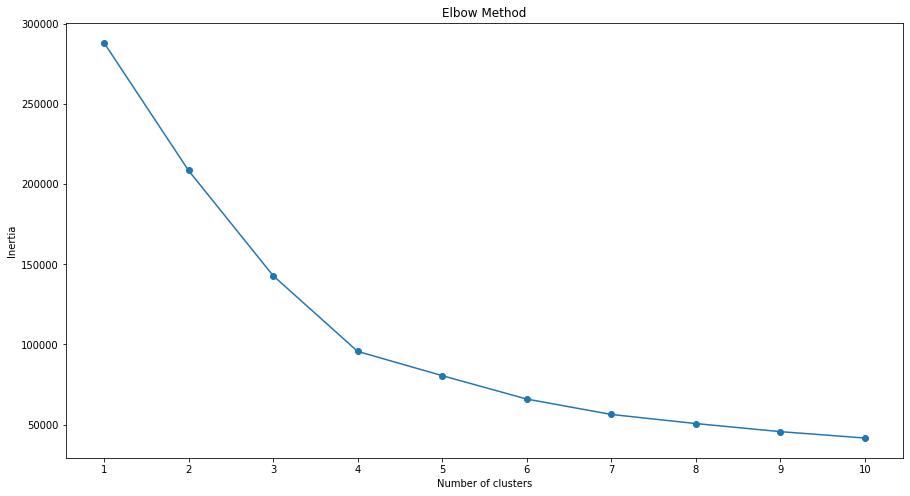

In [40]:
# Отображение графика инерции
fig, ax = plt.subplots(figsize=(15, 8)) 
ax.plot(range(1, 11), inertia) 
ax.set_title('Elbow Method') 
ax.set_xlabel('Number of clusters') 
ax.set_ylabel('Inertia')

x1, y1 = 2, inertia[1] 
x2, y2 = 5, inertia[4] 
X = [i for i in range(1,11)]
Y = inertia
ax.scatter(X, Y) 

plt.xticks(range(1, 11)) 
plt.show()

Оптимальное количество кластеров можно определить с помощью метода "локтя" или "локтевого метода". График "локтя" представляет собой кривую, которая показывает, как значение инерции изменяется в зависимости от количества кластеров. На графике обычно наблюдается "локоть" – точка, где инерция начинает заметно снижаться. Эта точка и определяет оптимальное количество кластеров.

На графике тяжело понять(предположим, что 4), поэтому попробую найти с помощью вычислений

In [41]:
# Нахождение оптимального количества кластеров на основе вычислений
elbow_index = 0
max_diff = 0
for i in range(1, len(inertia)-1):
    diff = abs(inertia[i] - inertia[i - 1])/abs(inertia[i+1] - inertia[i])
    if diff > max_diff:
        elbow_index = i
        max_diff = diff
optimal_clusters = elbow_index + 1
print("Оптимальное количество кластеров: ", optimal_clusters)

Оптимальное количество кластеров:  4


In [42]:
# Выбор оптимального количества кластеров (optimal_clusters)
kmeans = KMeans(n_clusters=optimal_clusters, random_state=1)
kmeans.fit(rfm_vectors)

# Добавление метки кластера в исходную таблицу
df_rfm['Segment'] = kmeans.labels_

# Рассчет средних значений R, F и M для каждого сегмента
df_summary = df_rfm.groupby(['Segment']).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']}).round(1)

In [43]:
# Описание каждого сегмента в терминах границ метрик R, F и M
for i in range(len(df_summary)):
    print(f"RFM-сегмент {i} (recency>={i}, frequency>={i}, monetary>={i}):")
    print("Recency: от ", df_summary['Recency']['mean'].iloc[i], " до ", df_summary['Recency']['mean'].iloc[i], " дней")
    print("Frequency: от ", df_summary['Frequency']['mean'].iloc[i], " до ", df_summary['Frequency']['mean'].iloc[i], " покупок")
    print("MonetaryValue: от ", df_summary['MonetaryValue']['mean'].iloc[i], " до ", df_summary['MonetaryValue']['mean'].iloc[i], " рублей в неделю\n")

RFM-сегмент 0 (recency>=0, frequency>=0, monetary>=0):
Recency: от  438.8  до  438.8  дней
Frequency: от  1.0  до  1.0  покупок
MonetaryValue: от  112.7  до  112.7  рублей в неделю

RFM-сегмент 1 (recency>=1, frequency>=1, monetary>=1):
Recency: от  178.4  до  178.4  дней
Frequency: от  1.0  до  1.0  покупок
MonetaryValue: от  113.2  до  113.2  рублей в неделю

RFM-сегмент 2 (recency>=2, frequency>=2, monetary>=2):
Recency: от  269.2  до  269.2  дней
Frequency: от  2.1  до  2.1  покупок
MonetaryValue: от  239.4  до  239.4  рублей в неделю

RFM-сегмент 3 (recency>=3, frequency>=3, monetary>=3):
Recency: от  290.2  до  290.2  дней
Frequency: от  1.0  до  1.0  покупок
MonetaryValue: от  1140.4  до  1140.4  рублей в неделю

